In [1]:
import os
import warnings
import pickle
import json
import logging
import logging.config
import numpy as np
# import imgstore.stores.multi as imgstore
import cv2
import matplotlib.pyplot as plt
plt.set_cmap("gray")
logging.config.dictConfig({
    "version": 1.0,
    "root":  {"level": "DEBUG"}
})

from confapp import conf

try:
    import local_settings
    conf += local_settings
except ImportError:
    pass

logger = logging.getLogger(__name__)

<Figure size 432x288 with 0 Axes>

In [2]:
from get_files import *
from library import *
import utils
import plotting

<Figure size 432x288 with 0 Axes>

In [3]:
experiments=get_experiments()
sampling_points = np.linspace(start = utils.hours(1), stop=utils.hours(36), num=100)
sampling_points_msec = sampling_points*1000

In [4]:
# dir(video_object)

In [5]:
def test_get_video_object():
    return get_video_object(experiments[0], 10)

In [6]:
def get_example_animal(animal=3, frame_number=143363):
    example_cache_file=os.path.join("cache", f"{animal}_{str(frame_number).zfill(10)}.pkl") 

    if os.path.exists(example_cache_file):
        with open(example_cache_file, "rb") as filehandle:
            example = pickle.load(filehandle)

    else:
        frame, contour, other_contours, centroid, body_size, filepath=utils.reproduce_example(animal, frame_number, experiments[0])
        example = {
            "frame": frame,
            "contour": contour,
            "other_contours": other_contours,
            "centroid": centroid,
            "body_size": body_size,
            "filepath": filepath,
        }

        with open(example_cache_file, "wb") as filehandle:
            pickle.dump(example, filehandle)
        
    return example

In [7]:
example = get_example_animal(
    # 5, 1259463
    # 3, 143363,
    # 5, 498525
    3, 5169123
)
# print(example)

In [8]:
crop, rotated, (T, mask, cloud, cloud_centered, cloud_center, rotate_matrix) = crop_animal_in_time_and_space(**example)

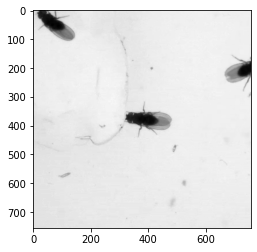

In [9]:
plt.imshow(crop)

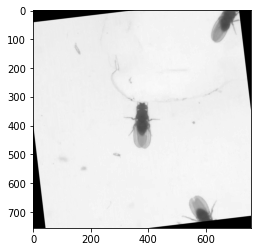

In [10]:
plt.imshow(rotated)

In [11]:
find_polarity(crop, mask, rotated, rotate_matrix, body_size=example["body_size"], filepath=example["filepath"])

False

In [ ]:
for experiment in experiments[0:1]:
    print(experiment)
    generate_dataset(experiment, sampling_points_msec)

6X/2022-04-02_16-09-56


  4%|▍         | 4/100 [01:11<29:22, 18.36s/it]